In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data Science\Data_Science_Class\Pandas\csv_data\car_price_prediction.csv')
df.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


# About Dataset
Assignment
Your notebooks must contain the following steps:

* Perform data cleaning and pre-processing.
  * What steps did you use in this process and how did you clean your data.
* Perform exploratory data analysis on the given dataset.
  * Explain each and every graphs that you make.
* Train a ml-model and evaluate it using different metrics.
  * Why did you choose that particular model? What was the accuracy?
* Hyperparameter optimization and feature selection is a plus.
* Model deployment and use of ml-flow is a plus.
* Perform model interpretation and show feature importance for your model.
  * Provide some explanation for the above point.
Future steps.

# Data profiling and Inspection

In [4]:
df.shape

(19237, 18)

* In this dataset have 19237 rows and 18 columns.

In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


* Max price 2.630750e+07.
* min price 1.000000e+00.
* mean price 1.855593e+04.
* 25% price  5.331000e+03.
* 50% price  1.317200e+04.
* 75% price  2.207500e+04.

In [6]:
df.describe(include=object)

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

* In this dataset has 0 missing values.

# Data Cleaning:
* Handling Missing Values:
  * Identify and fill in or remove missing values.
* Duplicates:
  * Check for and remove duplicate entries.
* Outliers:
  * Identify and address outliers that might skew the data.

  

In [8]:
df[df.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


* In this dataset 313 has an duplicated values

so, we can remove the duplicate rows if every rows of the column has an duplicate.

In [9]:
df.drop_duplicates(subset=['Price','Levy','Manufacturer','Model','Category','Fuel type','Mileage','Cylinders','Levy','Gear box type',	'Drive wheels','Gear box type','Doors',	'Wheel','Color','Airbags'],keep='last',inplace=True)

In [10]:
df.duplicated().sum()

0

# Data preprocessing & Handling missing values

In [11]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [12]:
df.sample(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
6386,45744911,15681,-,MERCEDES-BENZ,E 320,2004,Sedan,Yes,CNG,3.2,290000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Sky blue,10
13196,45809578,19030,446,HONDA,FIT,2014,Universal,Yes,Petrol,1.3,39373 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
13439,45755019,470,518,TOYOTA,Avalon,2016,Sedan,Yes,Hybrid,2.5,132645 km,4.0,Automatic,Front,04-May,Left wheel,White,12


* In this dataset has an no missing values.But there are some  Levy column has '-' this data.

so, We are replace '-' with 0 and transform the column to float

In [13]:
df['Levy']=df['Levy'].replace('-','0').astype('float')

In [14]:
df.sample(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
3116,45790612,16621,0.0,HYUNDAI,Elantra,2014,Sedan,No,Petrol,1.8,105600 km,4.0,Tiptronic,Front,04-May,Left wheel,Carnelian red,0
11441,45785807,10192,1047.0,KIA,Ceed,2007,Hatchback,Yes,Diesel,1.6,1000 km,1.0,Manual,Front,04-May,Left wheel,Grey,4
15196,45781525,11917,0.0,SUBARU,Forester,2006,Jeep,Yes,Petrol,2,150000 km,4.0,Automatic,4x4,04-May,Right-hand drive,White,4


*  Replace "km" with "" and transform the column to float

In [15]:

df['Mileage']= df['Mileage'].str.replace('km',"").astype("float")

In [16]:
# not important columns to out model (ID,DOORS)
df.drop(columns=['ID',"Doors",'Prod. year'],inplace=True)

In [17]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,Right-hand drive,Black,2
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,Left wheel,Silver,4
5,39493,891.0,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2,160931.0,4.0,Automatic,Front,Left wheel,White,4
9,26657,0.0,LEXUS,RX 350,Jeep,Yes,Petrol,3.5,128500.0,6.0,Automatic,4x4,Left wheel,Silver,12
11,8781,0.0,FORD,Transit,Microbus,No,CNG,4,0.0,8.0,Manual,Rear,Left wheel,Blue,0


Engine Volume 
 * we need to strip the 'Turbo' world in them , and convert it's type to float

In [18]:
# Replacing 'Turbo' 
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')

In [19]:
df = df.reset_index(drop=True)

In [20]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,Right-hand drive,Black,2
1,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,Left wheel,Silver,4
2,39493,891.0,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2,160931.0,4.0,Automatic,Front,Left wheel,White,4
3,26657,0.0,LEXUS,RX 350,Jeep,Yes,Petrol,3.5,128500.0,6.0,Automatic,4x4,Left wheel,Silver,12
4,8781,0.0,FORD,Transit,Microbus,No,CNG,4,0.0,8.0,Manual,Rear,Left wheel,Blue,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15707 entries, 0 to 15706
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15707 non-null  int64  
 1   Levy              15707 non-null  float64
 2   Manufacturer      15707 non-null  object 
 3   Model             15707 non-null  object 
 4   Category          15707 non-null  object 
 5   Leather interior  15707 non-null  object 
 6   Fuel type         15707 non-null  object 
 7   Engine volume     15707 non-null  object 
 8   Mileage           15707 non-null  float64
 9   Cylinders         15707 non-null  float64
 10  Gear box type     15707 non-null  object 
 11  Drive wheels      15707 non-null  object 
 12  Wheel             15707 non-null  object 
 13  Color             15707 non-null  object 
 14  Airbags           15707 non-null  int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 1.8+ MB


In [33]:
# extract numerical data
numerical_data = df.select_dtypes(include='number')
numerical_data.head()

,Price,Levy,Mileage,Cylinders,Airbags
0,8467,0.0,200000.0,4.0,2
1,11726,446.0,91901.0,4.0,4
2,39493,891.0,160931.0,4.0,4
3,26657,0.0,128500.0,6.0,12
4,8781,0.0,0.0,8.0,0


In [34]:
# Categorical data
categorical_data = df.select_dtypes(include='object')
categorical_data.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Wheel,Color
0,HONDA,FIT,Hatchback,No,Petrol,1.3,Variator,Front,Right-hand drive,Black
1,HONDA,FIT,Hatchback,Yes,Petrol,1.3,Automatic,Front,Left wheel,Silver
2,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2,Automatic,Front,Left wheel,White
3,LEXUS,RX 350,Jeep,Yes,Petrol,3.5,Automatic,4x4,Left wheel,Silver
4,FORD,Transit,Microbus,No,CNG,4,Manual,Rear,Left wheel,Blue


# Handling Outliers

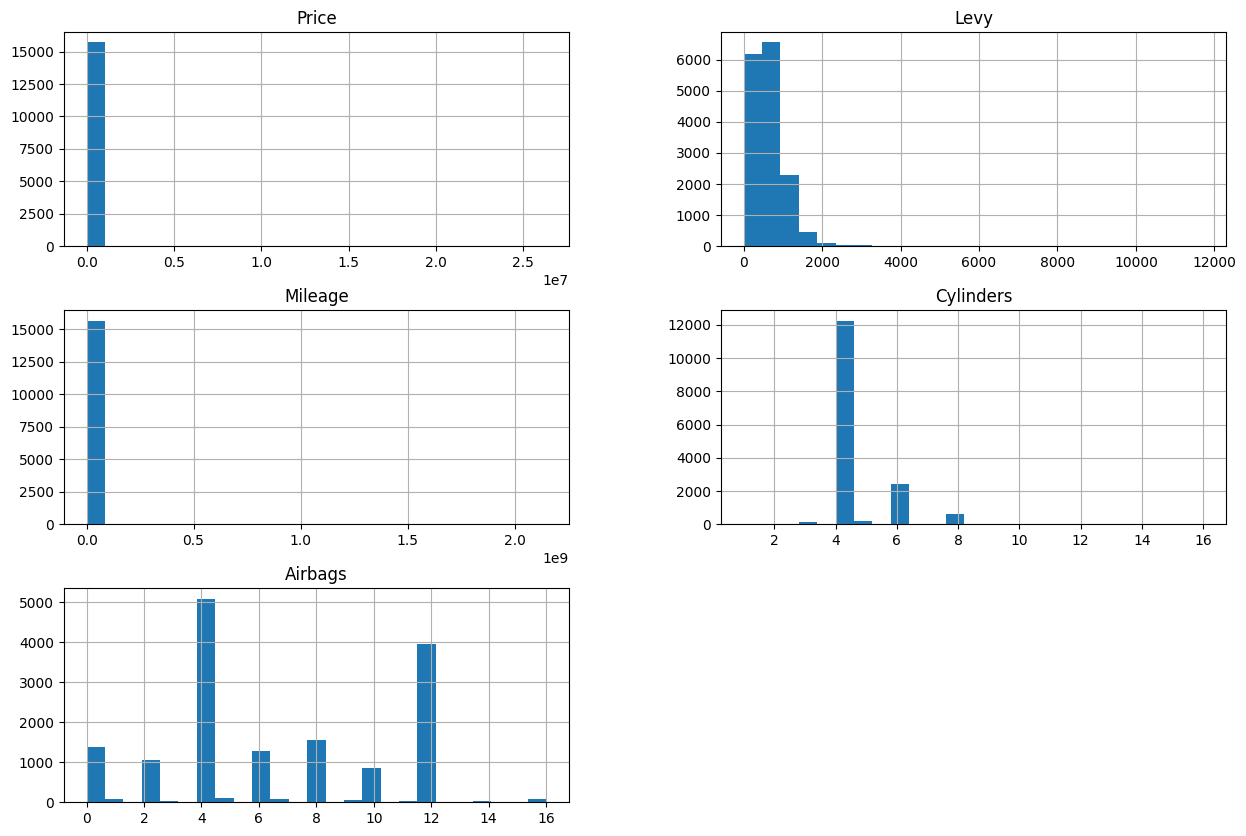

In [37]:
df.hist(bins=25,figsize=(15,10))
plt.show()

<Axes: xlabel='Cylinders', ylabel='Density'>

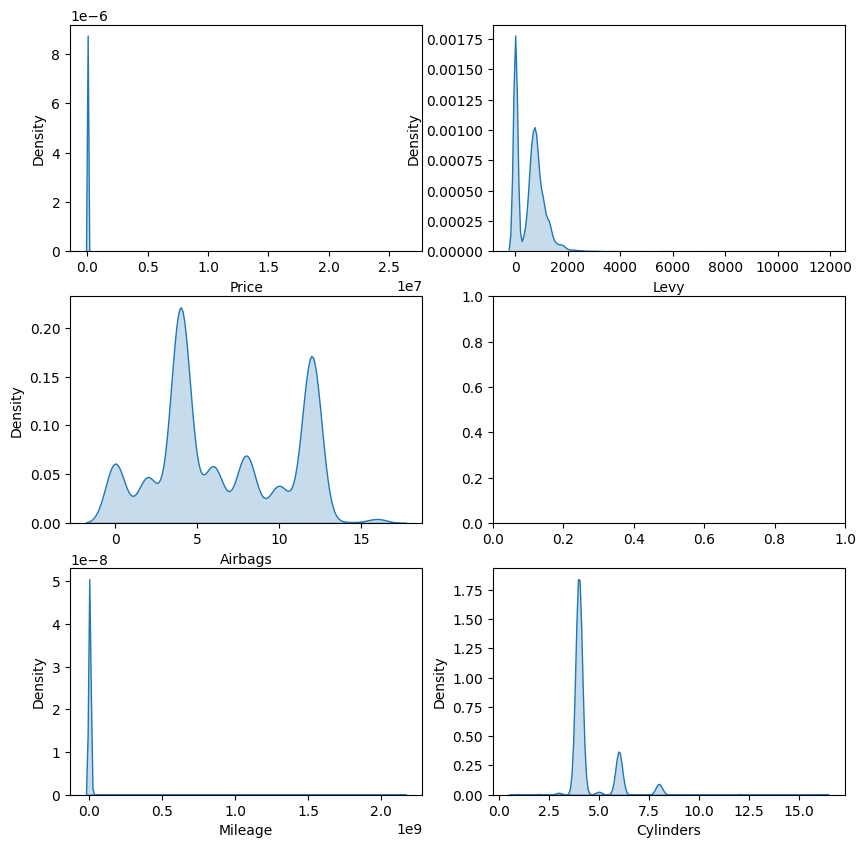

In [36]:
fig, axes = plt.subplots(3,2, figsize=(10,10))
sns.kdeplot(numerical_data['Price'],fill=True,ax=axes[0,0])
sns.kdeplot(numerical_data['Levy'],fill=True,ax=axes[0,1])
sns.kdeplot(numerical_data['Airbags'],fill=True,ax=axes[1,0])

sns.kdeplot(numerical_data['Mileage'],fill=True,ax=axes[2,0])
sns.kdeplot(df['Cylinders'],fill=True,ax=axes[2,1])

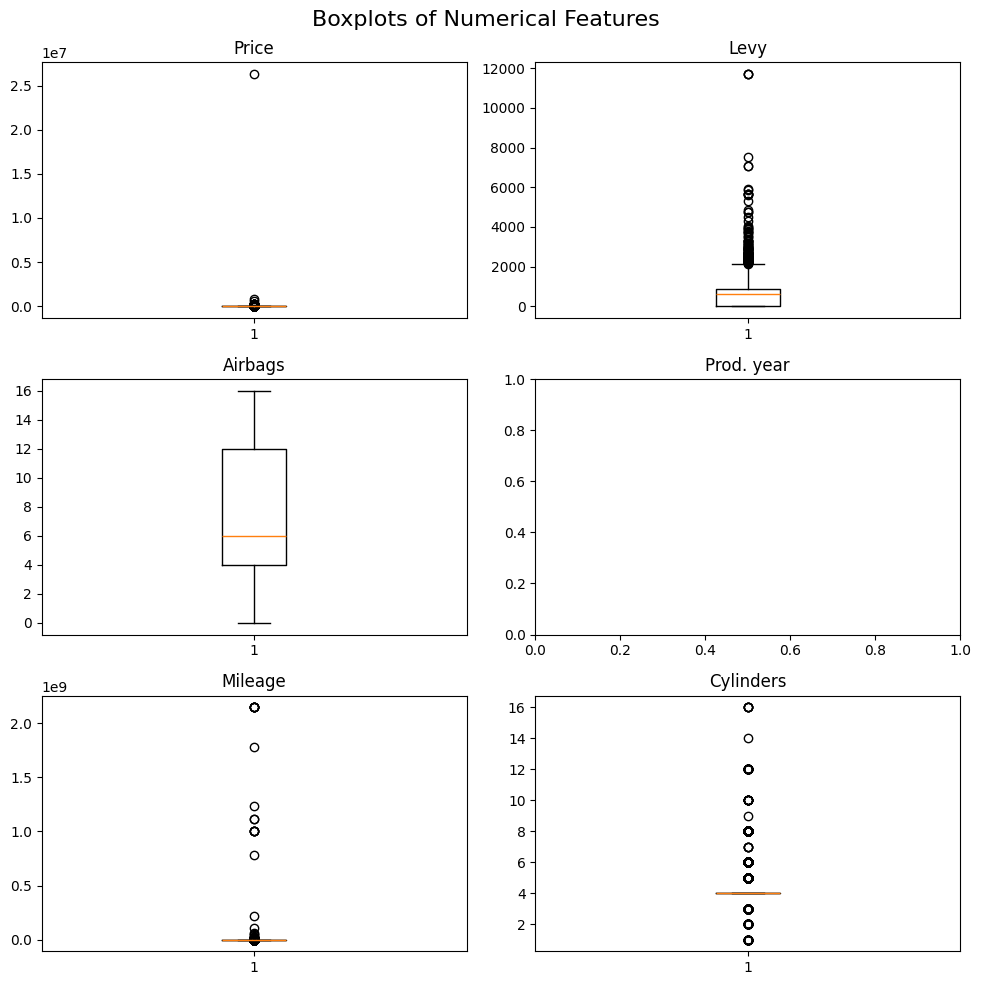

In [26]:
fig, axes = plt.subplots(3,2,figsize=(10,10))
axes[0,0].boxplot(numerical_data['Price'])
axes[0,1].boxplot(numerical_data['Levy'])
axes[1,0].boxplot(numerical_data['Airbags'])

axes[2,0].boxplot(numerical_data['Mileage'])
axes[2,1].boxplot(numerical_data['Cylinders'])

axes[0,0].set_title('Price')
axes[0,1].set_title('Levy')
axes[1,0].set_title('Airbags')
axes[1,1].set_title('Prod. year')
axes[2,0].set_title('Mileage')
axes[2,1].set_title('Cylinders')

plt.suptitle("Boxplots of Numerical Features",fontsize=16)
plt.tight_layout()
plt.show()


plot the Category countplot 

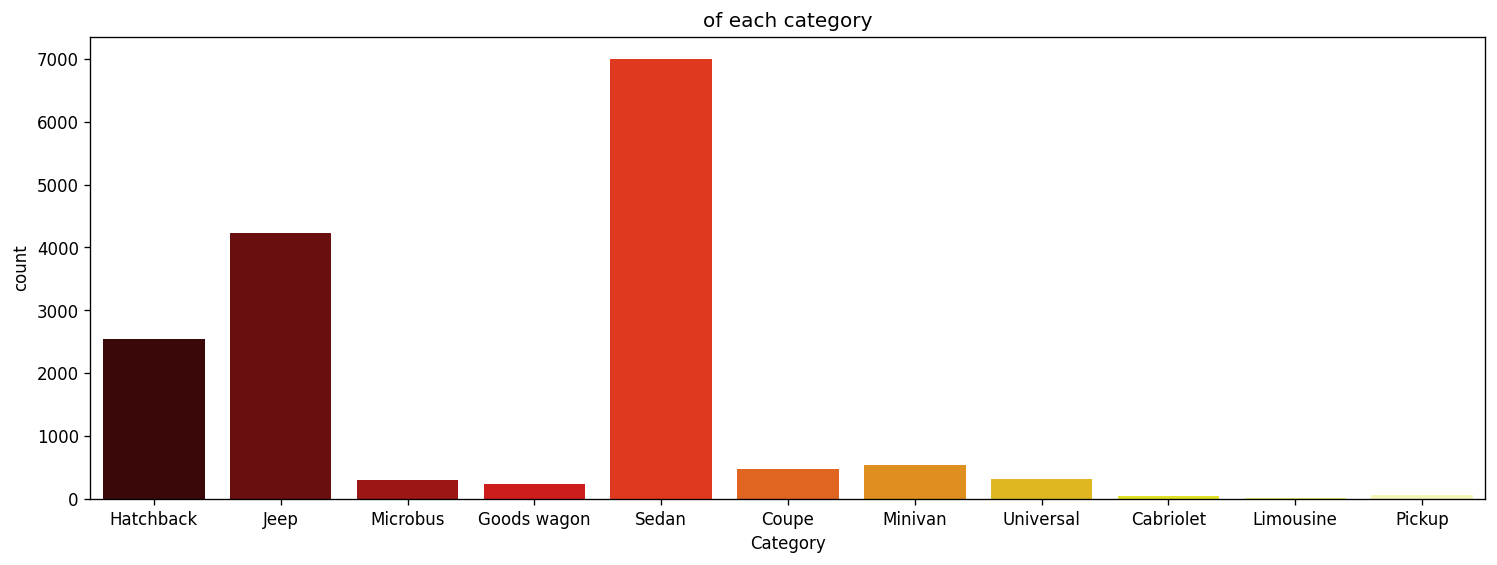

In [53]:
plt.figure(figsize=(15,5),dpi=120)
sns.countplot(data=df,x = df['Category'],hue='Category',palette='hot')
plt.title("of each category")
plt.show()

* Most types of Categories are Sedan, Hatchback and jeep.

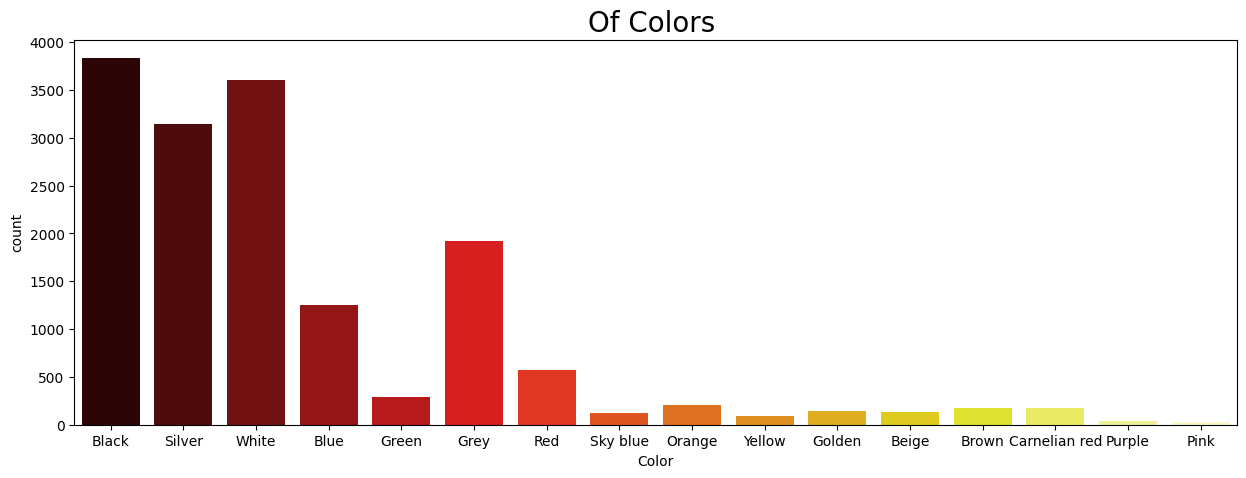

In [56]:
# plot the color 
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Color',hue='Color',palette='hot')
plt.title('Of Colors ',fontsize = 20)
plt.show()

* the most sold car colors are Black,white,silver and Gray

In [57]:
top_10_cars = df.Manufacturer.value_counts().sort_values(ascending=False)[:10]
top_10_cars

Manufacturer
HYUNDAI          3050
TOYOTA           2859
MERCEDES-BENZ    1450
CHEVROLET         968
FORD              956
BMW               924
HONDA             870
NISSAN            593
VOLKSWAGEN        556
LEXUS             421
Name: count, dtype: int64

C:\Users\ashmi\AppData\Local\Temp\ipykernel_8240\2154010573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cars.index,y= top_10_cars,palette='hot',legend=False)


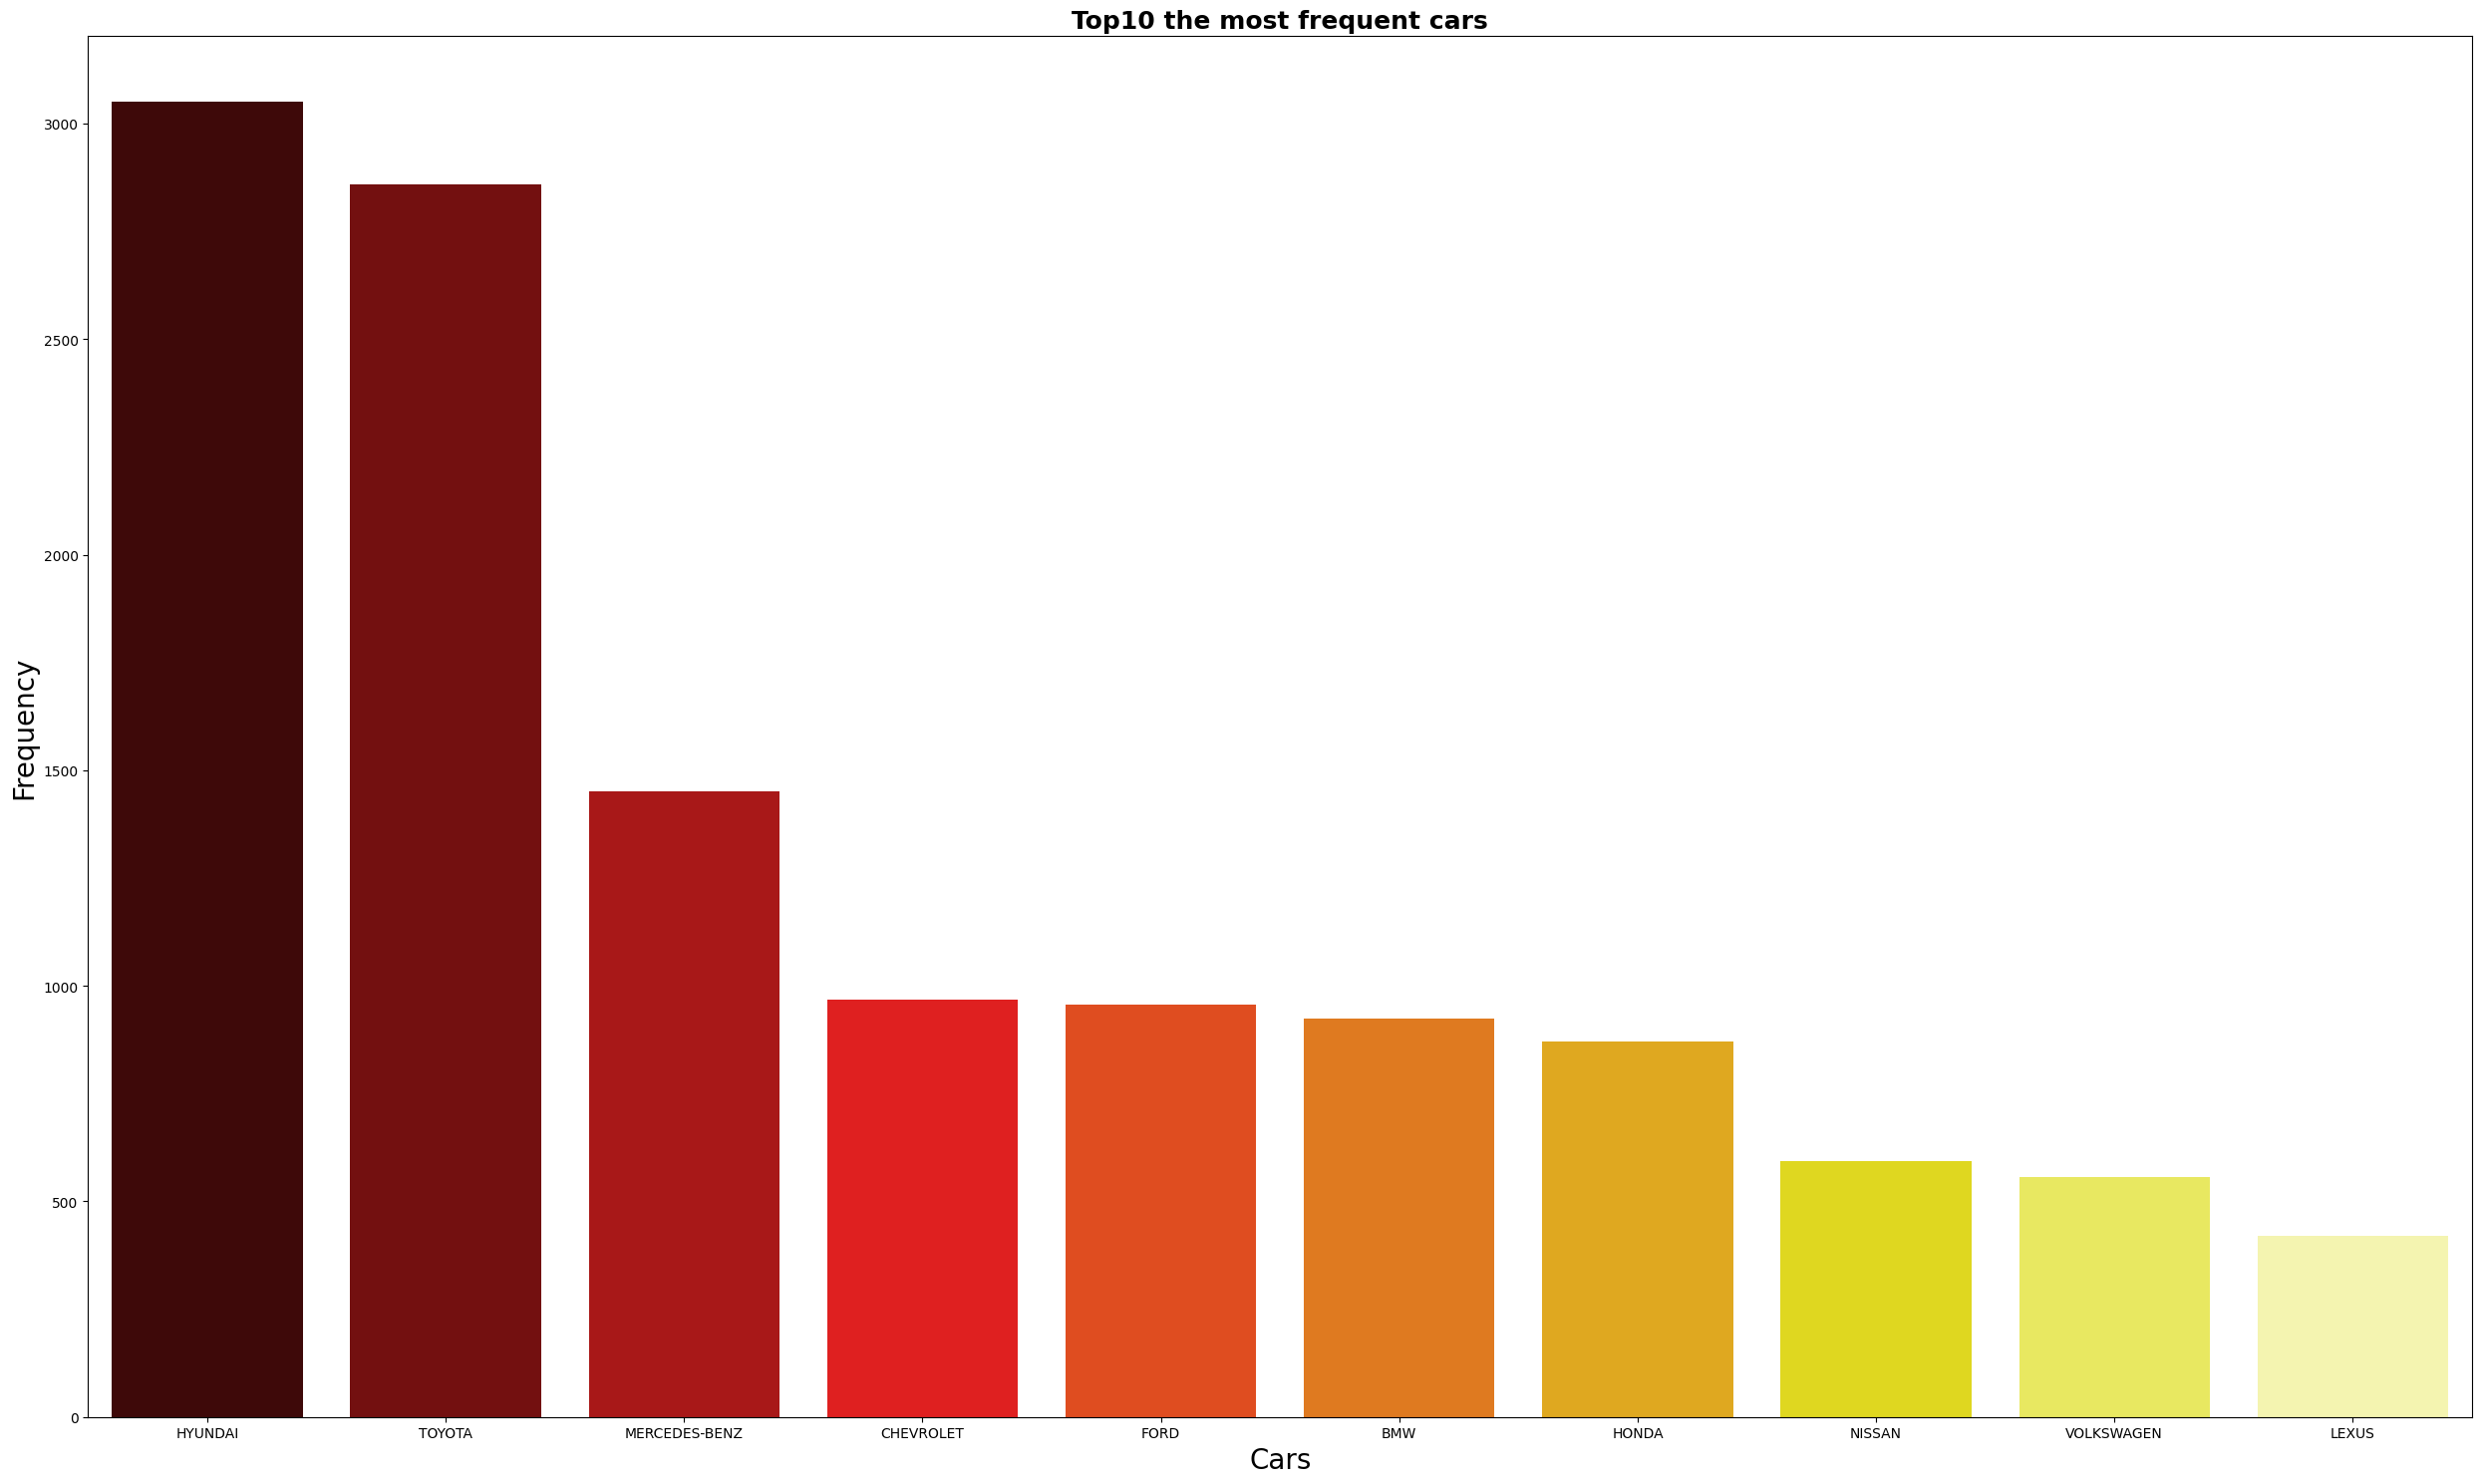

In [75]:
plt.figure(figsize=(25,15))
sns.barplot(x=top_10_cars.index,y= top_10_cars,palette='hot',legend=False)
plt.title("Top10 the most frequent cars",loc='center',fontweight = 'bold',fontsize = 18)
plt.xlabel('Cars',fontsize = 20)
plt.ylabel("Frequency",fontsize = 20)
plt.tight_layout()
plt.show()

# Feature selection